# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [5]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [6]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n clusters 2 Silhoutte_avg: 0.5027144446956527
For n clusters 3 Silhoutte_avg: 0.6105565451092732
For n clusters 4 Silhoutte_avg: 0.6270122040179333
For n clusters 5 Silhoutte_avg: 0.6115749260799671
For n clusters 6 Silhoutte_avg: 0.5499388428924794
For n clusters 7 Silhoutte_avg: 0.4695416652197068
For n clusters 8 Silhoutte_avg: 0.4231800504179843


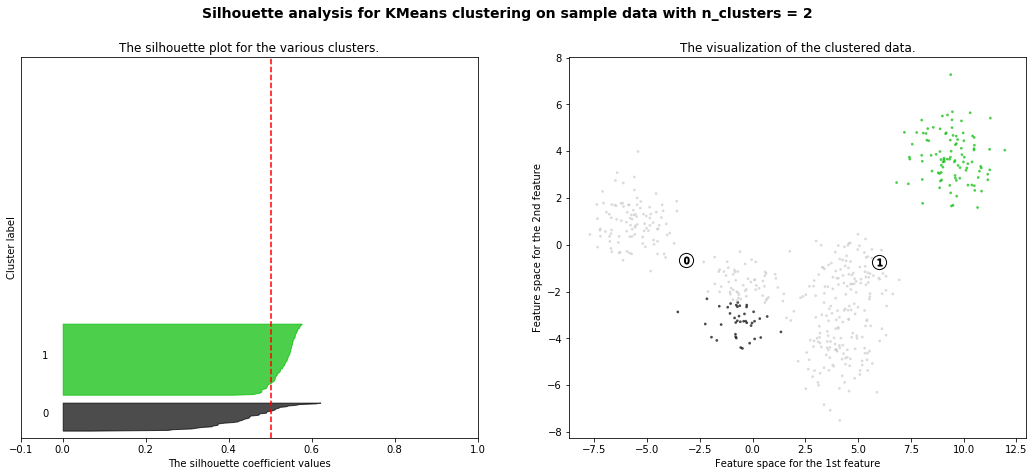

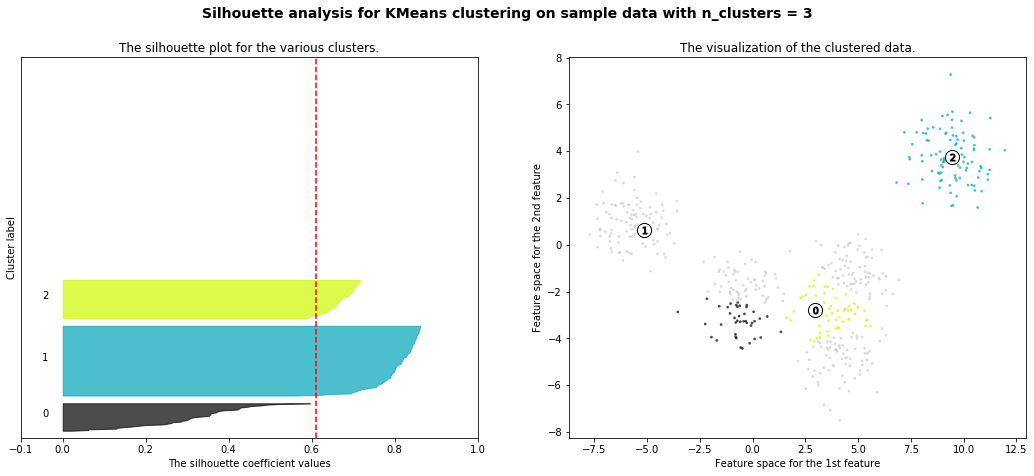

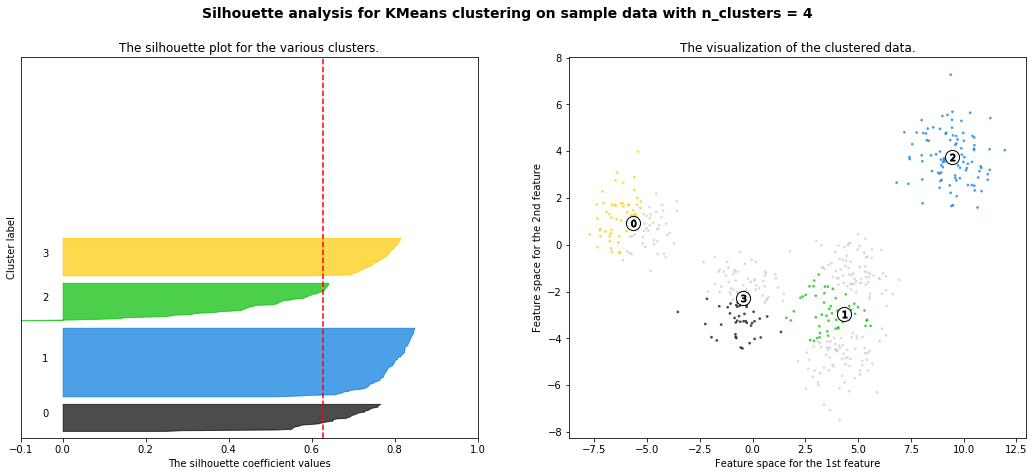

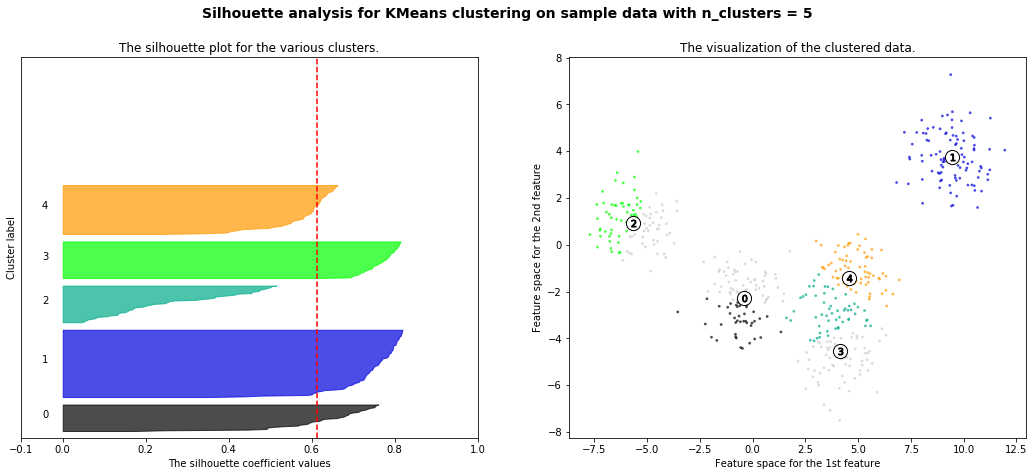

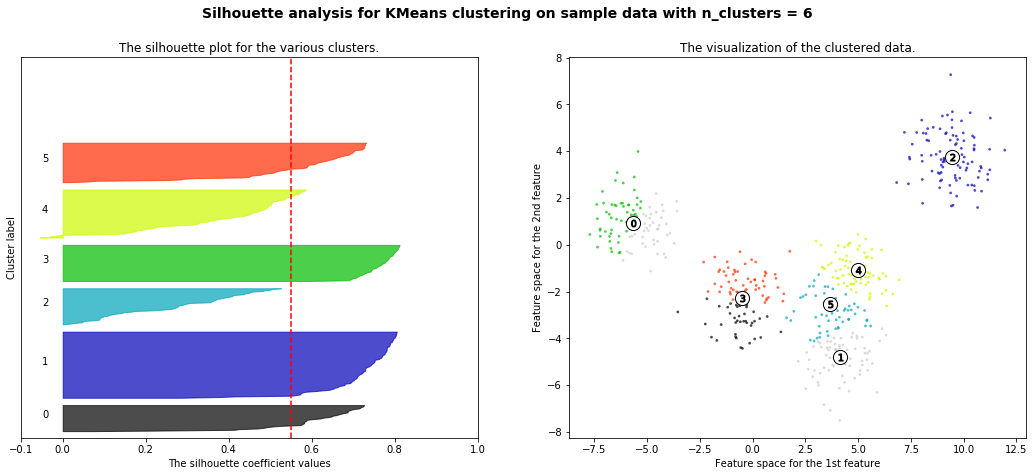

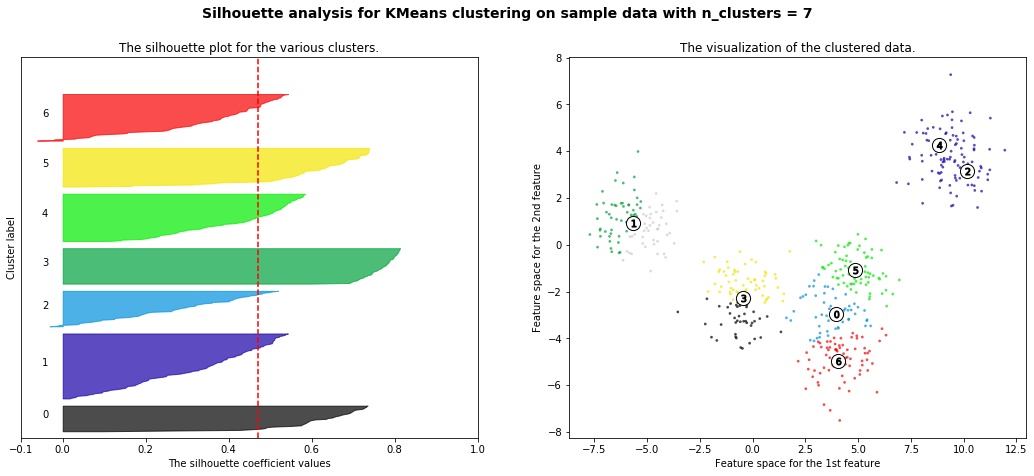

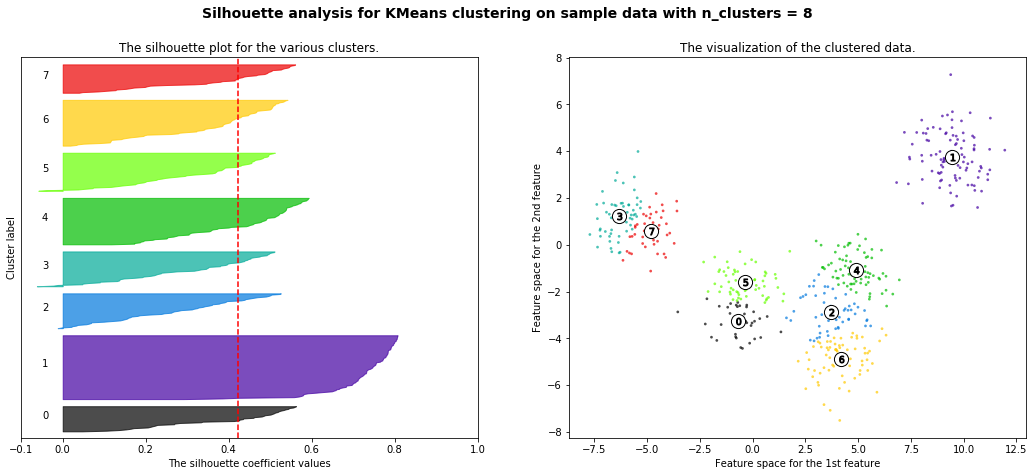

In [52]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2) # 兩個圖片物件, fig用做調整 , (1,3)的話 要開(ax1, ax2, ax3)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim(0, len(X) + (n_clusters+1)*10) # clusters越來越多
    
    # 宣告 KMean 分群器, 對 X 訓練並預測
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_label = clusterer.fit_predict(X)
    
    # 計算所有點的 silhouette_score 平均
    silhouette_avg = silhouette_score(X, cluster_label)
    print(f'For n clusters {n_clusters} Silhoutte_avg: {silhouette_avg}')
    
    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_label)
    y_lower = 10
    
    for i in range(n_clusters):
        # 過濾label 然後排序
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                  0, ith_cluster_silhouette_values,
                  facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 字的位置
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # 垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # ax2 想要看每個樣本點的分群狀態,從另一個角度觀察分群
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    # s , linewidths
    # ax2 將中心點標注出來
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    # s for scale
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i , alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    # 最高級的標題
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()